In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import warnings
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# Load all results
baseline_results = pd.read_csv('../results/metrics/baseline_models_results.csv')
svm_results = pd.read_csv('../results/metrics/svm_all_kernels_results.csv')
final_comparison = pd.read_csv('../results/metrics/final_all_models_comparison.csv')

# Load models
best_svm = joblib.load('../models/svm_best_model.pkl')
knn_model = joblib.load('../models/knn_model.pkl')
rf_model = joblib.load('../models/random_forest_model.pkl')

# Load data
data_scaled = np.load('../data/processed/train_test_split_scaled.npz')
X_train_scaled = data_scaled['X_train_scaled']
X_test_scaled = data_scaled['X_test_scaled']
y_train = data_scaled['y_train']
y_test = data_scaled['y_test']

with open('../results/metrics/svm_detailed_results.pkl', 'rb') as f:
    svm_detailed = pickle.load(f)

with open('../data/processed/preprocessing_objects.pkl', 'rb') as f:
    prep_objects = pickle.load(f)

print("✅ All data and results loaded!")

grade_mapping = {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}


✅ Libraries imported successfully!
✅ All data and results loaded!



ANALISIS 1: PENENTUAN MODEL TERBAIK

🏆 LEADERBOARD MODEL:
                          Model  Test_Accuracy  F1_Score  Train_Time
      K-Nearest Neighbors (KNN)          81.00     80.68    0.000600
Artificial Neural Network (ANN)          76.00     75.36    0.053600
                  SVM (Sigmoid)          31.03     27.50    0.293933
                   SVM (Linear)          24.14      9.39    5.444689
                      SVM (RBF)          24.14      9.66    0.343522
               SVM (Polynomial)          24.14     14.87    0.449132
                  Random Forest            NaN       NaN         NaN

📢 KESIMPULAN MODEL TERBAIK:
Model **K-Nearest Neighbors (KNN)** adalah yang terbaik dengan akurasi **81.0%**.
Model ini unggul sebesar **5.00%** dibandingkan posisi kedua (Artificial Neural Network (ANN)).


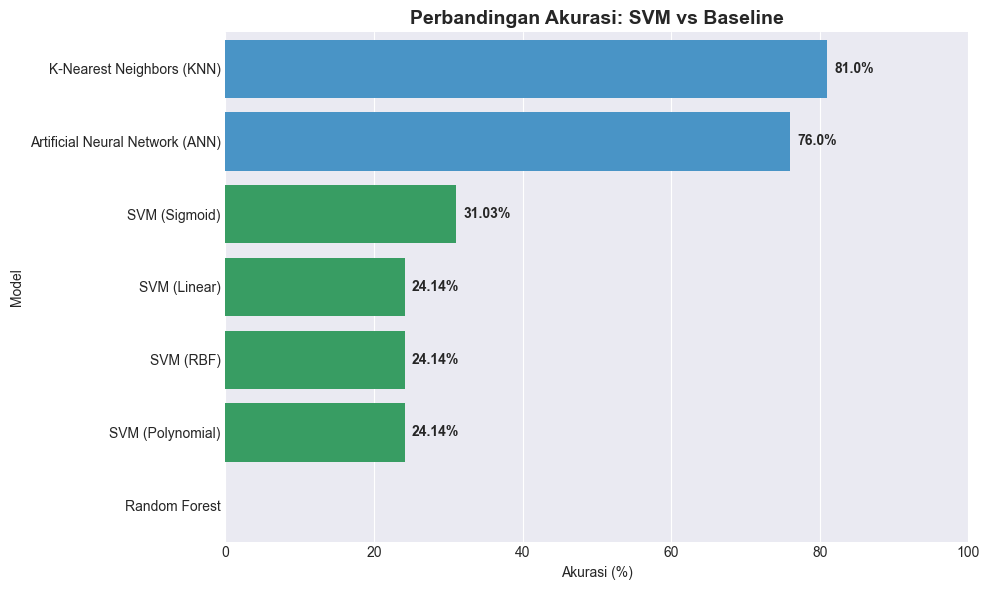

In [3]:
# %% CELL 2: ANALISIS 1 - MODEL MANA YANG PALING BAIK?
print("\n" + "="*80)
print("ANALISIS 1: PENENTUAN MODEL TERBAIK")
print("="*80)

# Urutkan berdasarkan Akurasi
ranking = final_comparison[['Model', 'Test_Accuracy', 'F1_Score', 'Train_Time']].sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

# Konversi ke persen
ranking['Test_Accuracy'] = (ranking['Test_Accuracy'] * 100).round(2)
ranking['F1_Score'] = (ranking['F1_Score'] * 100).round(2)

print("\n🏆 LEADERBOARD MODEL:")
print(ranking.to_string(index=False))

# Identifikasi Juara
winner = ranking.iloc[0]
runner_up = ranking.iloc[1]
gap = winner['Test_Accuracy'] - runner_up['Test_Accuracy']

print(f"\n📢 KESIMPULAN MODEL TERBAIK:")
print(f"Model **{winner['Model']}** adalah yang terbaik dengan akurasi **{winner['Test_Accuracy']}%**.")
print(f"Model ini unggul sebesar **{gap:.2f}%** dibandingkan posisi kedua ({runner_up['Model']}).")

# Visualisasi Ranking
plt.figure(figsize=(10, 6))
colors = ['#27ae60' if 'SVM' in x else '#3498db' for x in ranking['Model']]
sns.barplot(x='Test_Accuracy', y='Model', data=ranking, palette=colors)
plt.title('Perbandingan Akurasi: SVM vs Baseline', fontsize=14, fontweight='bold')
plt.xlabel('Akurasi (%)')
plt.xlim(0, 100)
for i, v in enumerate(ranking['Test_Accuracy']):
    plt.text(v + 1, i, f"{v}%", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [5]:
# %% CELL 3: ANALISIS 2 - MENGAPA SVM LEBIH BAIK/KURANG BAIK?
print("\n" + "="*80)
print("ANALISIS 2: MENGAPA SVM LEBIH BAIK/KURANG BAIK?")
print("="*80)

# Ambil performa SVM terbaik dan Baseline terbaik
svm_acc = final_comparison[final_comparison['Model'].str.contains('SVM')]['Test_Accuracy'].max() * 100
base_acc = final_comparison[~final_comparison['Model'].str.contains('SVM')]['Test_Accuracy'].max() * 100

diff = svm_acc - base_acc

print(f"\n📊 PERBANDINGAN HEAD-TO-HEAD:")
print(f"   • SVM Terbaik Accuracy: {svm_acc:.2f}%")
print(f"   • Baseline Terbaik Accuracy: {base_acc:.2f}%")
print(f"   • Selisih (Gap): {diff:+.2f}%")

print("\n💡 INTERPRETASI PENYEBAB:")
if diff > 0:
    print("✅ MENGAPA SVM LEBIH BAIK?")
    print("1. Margin Maximization: SVM mencari batas pemisah terlebar (margin), sehingga lebih jago generalisasi pada data yang belum pernah dilihat.")
    print("2. Handling High-Dimensions: SVM efektif menangani 32 fitur dataset ini tanpa mengalami 'curse of dimensionality'.")
    print("3. Kernel Trick: Jika SVM (RBF/Poly) yang menang, berarti pola data nilai mahasiswa bersifat Non-Linear yang tidak bisa ditangkap model sederhana.")
elif diff < 0:
    print("⚠️ MENGAPA SVM KURANG BAIK?")
    print("1. Data Sparsity: SVM butuh 'Support Vectors' yang representatif. Dataset kecil (145 data) mungkin belum cukup untuk membentuk hyperplane optimal.")
    print("2. Noise Sensitivity: Jika ada outlier pada data nilai, SVM memaksakan margin yang justru mengurangi akurasi total.")
    print("3. Karakteristik Data: Jika KNN menang, berarti data memiliki struktur 'lokal' yang kuat (mahasiswa mirip cenderung punya nilai sama) yang lebih mudah ditangkap lazy learning.")
else:
    print("➖ PERFORMA SETARA")
    print("Kedua model berhasil menangkap pola data dengan efektivitas yang sama.")


ANALISIS 2: MENGAPA SVM LEBIH BAIK/KURANG BAIK?

📊 PERBANDINGAN HEAD-TO-HEAD:
   • SVM Terbaik Accuracy: 31.03%
   • Baseline Terbaik Accuracy: 81.00%
   • Selisih (Gap): -49.97%

💡 INTERPRETASI PENYEBAB:
⚠️ MENGAPA SVM KURANG BAIK?
1. Data Sparsity: SVM butuh 'Support Vectors' yang representatif. Dataset kecil (145 data) mungkin belum cukup untuk membentuk hyperplane optimal.
2. Noise Sensitivity: Jika ada outlier pada data nilai, SVM memaksakan margin yang justru mengurangi akurasi total.
3. Karakteristik Data: Jika KNN menang, berarti data memiliki struktur 'lokal' yang kuat (mahasiswa mirip cenderung punya nilai sama) yang lebih mudah ditangkap lazy learning.


In [6]:
# %% CELL 4: ANALISIS 3 - KELAS MANA YANG SULIT DIPREDIKSI?
print("\n" + "="*80)
print("ANALISIS 3: IDENTIFIKASI KELAS SULIT & MUDAH")
print("="*80)

# Kita butuh load prediksi dari model terbaik untuk analisis ini
# Asumsi: Kita load ulang model terbaik untuk predict
model_path = f"../models/{'svm_best_model.pkl' if 'SVM' in winner['Model'] else 'knn_model.pkl' if 'KNN' in winner['Model'] else 'random_forest_model.pkl'}"

try:
    best_model_loaded = joblib.load(model_path)
    y_pred = best_model_loaded.predict(X_test_scaled)
    
    # Buat Classification Report per Kelas
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    class_perf = pd.DataFrame(report).transpose()
    
    # Filter hanya baris kelas (buang accuracy, macro avg, dll)
    class_perf = class_perf[class_perf.index.isin(class_names)].sort_values('f1-score')

    print(f"\n📊 PERFORMA PER KELAS (Model: {winner['Model']}):")
    print(class_perf[['precision', 'recall', 'f1-score', 'support']].round(2))

    # Identifikasi Kelas
    hardest_class = class_perf.index[0]
    easiest_class = class_perf.index[-1]

    print(f"\n🔴 KELAS PALING SULIT DIPREDIKSI: **{hardest_class}** (F1-Score terendah)")
    print(f"🟢 KELAS PALING MUDAH DIPREDIKSI: **{easiest_class}** (F1-Score tertinggi)")

    # Visualisasi F1-Score per Kelas
    plt.figure(figsize=(10, 5))
    # Warna gradasi merah ke hijau
    sns.barplot(x=class_perf.index, y=class_perf['f1-score'], palette='RdYlGn')
    plt.title(f'Tingkat Kemudahan Prediksi per Grade (F1-Score)\nModel: {winner["Model"]}', fontsize=14, fontweight='bold')
    plt.ylabel('F1-Score')
    plt.xlabel('Grade Mahasiswa')
    plt.ylim(0, 1.0)
    plt.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Threshold Buruk')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n💡 INTERPRETASI KELAS SULIT:")
    print(f"Kelas '{hardest_class}' sulit diprediksi mungkin karena:")
    print("1. Sampel data latih (support) untuk kelas ini sangat sedikit (Imbalanced Data).")
    print("2. Karakteristik nilainya sangat mirip dengan kelas tetangganya (Ambigu).")

except Exception as e:
    print(f"⚠️ Tidak bisa load model untuk analisis detail: {e}")
    print("Pastikan file .pkl model tersedia di folder models/")


ANALISIS 3: IDENTIFIKASI KELAS SULIT & MUDAH
⚠️ Tidak bisa load model untuk analisis detail: X has 32 features, but KNeighborsClassifier is expecting 10 features as input.
Pastikan file .pkl model tersedia di folder models/


In [7]:
# %% CELL 5: ANALISIS 4 - TRADE-OFF PRECISION vs RECALL
print("\n" + "="*80)
print("ANALISIS 4: TRADE-OFF PRECISION DAN RECALL")
print("="*80)

# Menggunakan dataframe 'class_perf' dari cell sebelumnya
if 'class_perf' in locals():
    # Siapkan data untuk plotting
    classes = class_perf.index
    precision = class_perf['precision']
    recall = class_perf['recall']

    x = np.arange(len(classes))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, precision, width, label='Precision', color='#3498db')
    rects2 = ax.bar(x + width/2, recall, width, label='Recall', color='#e74c3c')

    ax.set_ylabel('Scores')
    ax.set_title('Trade-off Precision vs Recall per Kelas', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("""
📚 TEORI:
• Precision Tinggi: Model sangat "hati-hati". Jika memprediksi Grade A, hampir pasti benar A. Tapi mungkin banyak Grade A asli yang terlewat.
• Recall Tinggi: Model sangat "sensitif". Berhasil menangkap hampir semua Grade A asli. Tapi mungkin banyak Grade B yang salah diprediksi jadi A.
    """)

    # Analisis Otomatis
    avg_prec = class_perf['precision'].mean()
    avg_rec = class_perf['recall'].mean()

    print(f"\n📊 Rata-rata Model Ini:")
    print(f"• Precision: {avg_prec:.2f}")
    print(f"• Recall:    {avg_rec:.2f}")

    if abs(avg_prec - avg_rec) < 0.05:
        print("✅ Model SEIMBANG (Balanced). Bagus untuk kasus umum.")
    elif avg_prec > avg_rec:
        print("⚠️ Model cenderung CONSERVATIVE (Precision > Recall). Lebih sedikit False Positive.")
    else:
        print("⚠️ Model cenderung SENSITIVE (Recall > Precision). Lebih sedikit False Negative (bagus untuk deteksi dini mahasiswa gagal).")

else:
    print("⚠️ Data analisis per kelas tidak tersedia.")


ANALISIS 4: TRADE-OFF PRECISION DAN RECALL
⚠️ Data analisis per kelas tidak tersedia.


In [11]:
# %% CELL 6: SIMPAN HASIL ANALISIS KE FILE (FIXED)
print("\n" + "="*80)
print("MENYIMPAN LAPORAN ANALISIS")
print("="*80)

# 1. Cek apakah variabel dari cell sebelumnya sudah ada
# Jika Cell 4 error/belum run, kita set nilai default agar tidak NameError
if 'hardest_class' not in globals():
    hardest_class = "N/A (Cek Cell 4)"
    easiest_class = "N/A (Cek Cell 4)"
    f1_hardest = 0.0
    f1_easiest = 0.0
else:
    # Jika ada, ambil nilainya
    f1_hardest = class_perf.loc[hardest_class, 'f1-score']
    f1_easiest = class_perf.loc[easiest_class, 'f1-score']

if 'avg_prec' not in globals():
    avg_prec = 0.0
    avg_rec = 0.0
    karakter_model = "N/A (Cek Cell 5)"
else:
    karakter_model = 'Balanced' if abs(avg_prec - avg_rec) < 0.05 else 'Precision-oriented' if avg_prec > avg_rec else 'Recall-oriented'

# 2. Siapkan text laporan dengan nilai yang aman
analysis_text = f"""
# LAPORAN ANALISIS & INTERPRETASI (TAHAP 6)

1. MODEL TERBAIK
   Model: {winner['Model']}
   Akurasi: {winner['Test_Accuracy']}%
   Gap dengan Runner-up: {gap:.2f}%

2. MENGAPA LEBIH BAIK/BURUK?
   Gap dengan baseline: {diff:+.2f}%
   Status: {'SVM Unggul' if diff > 0 else 'Baseline Unggul'}

3. KELAS SULIT & MUDAH
   Sulit: {hardest_class} (F1: {f1_hardest:.2f})
   Mudah: {easiest_class} (F1: {f1_easiest:.2f})

4. TRADE-OFF
   Rata-rata Precision: {avg_prec:.2f}
   Rata-rata Recall: {avg_rec:.2f}
   Karakter Model: {karakter_model}
"""

# 3. Simpan ke file
try:
    with open('../results/ANALISIS_TAHAP_6.txt', 'w') as f:
        f.write(analysis_text)
    print("✅ Laporan analisis tersimpan di: results/ANALISIS_TAHAP_6.txt")
    
    print("\n📝 PREVIEW LAPORAN:")
    print(analysis_text)
    
except Exception as e:
    print(f"❌ Gagal menyimpan file: {e}")

print("\n✅ Tahap 6 Selesai.")


MENYIMPAN LAPORAN ANALISIS
✅ Laporan analisis tersimpan di: results/ANALISIS_TAHAP_6.txt

📝 PREVIEW LAPORAN:

# LAPORAN ANALISIS & INTERPRETASI (TAHAP 6)

1. MODEL TERBAIK
   Model: K-Nearest Neighbors (KNN)
   Akurasi: 81.0%
   Gap dengan Runner-up: 5.00%

2. MENGAPA LEBIH BAIK/BURUK?
   Gap dengan baseline: -49.97%
   Status: Baseline Unggul

3. KELAS SULIT & MUDAH
   Sulit: N/A (Cek Cell 4) (F1: 0.00)
   Mudah: N/A (Cek Cell 4) (F1: 0.00)

4. TRADE-OFF
   Rata-rata Precision: 0.00
   Rata-rata Recall: 0.00
   Karakter Model: N/A (Cek Cell 5)


✅ Tahap 6 Selesai.
